In [192]:
from bs4 import BeautifulSoup
import pandas as pd
with open("drugbank_partial.xml", 'r') as file:
    xml_page = file.read()

soup = BeautifulSoup(xml_page, 'xml')
data = soup.find_all(lambda lek: lek.name == 'drug' and lek.has_attr('xmlns'))
wiersze = []

for lek in data:
    interakcje = []
    bloki = lek.find_all('food-interactions')
    
    for i in bloki:
        interakcje += i.find_all('food-interaction')
        
    lek_info = {
        'ID' : lek.find(lambda atr: atr.name == 'drugbank-id' and atr.has_attr('primary')).text,
        'Name' : lek.find('name').text,
        'Typ' : lek['type'],
        'Opis' : lek.find('description').text,
        'Postać' : lek.find('state').text,
        'Wskazania' : lek.find('indication').text,
        'Mechanizm działania': lek.find('mechanism-of-action').text,
        'Interakcje z pokarmami': [i.text for i in interakcje]    
    }
    wiersze.append(lek_info)

wynik = pd.DataFrame(wiersze)
wynik

,ID,Name,Typ,Opis,Postać,Wskazania,Mechanizm działania,Interakcje z pokarmami
0,DB00001,Lepirudin,biotech,Lepirudin is a recombinant hirudin formed by 6...,solid,Lepirudin is indicated for anticoagulation in ...,Lepirudin is a direct thrombin inhibitor used ...,[Avoid herbs and supplements with anticoagulan...
1,DB00002,Cetuximab,biotech,Cetuximab is a recombinant chimeric human/mous...,liquid,Cetuximab indicated for the treatment of local...,The epidermal growth factor receptor (EGFR) is...,[]
2,DB00003,Dornase alfa,biotech,Dornase alfa is a biosynthetic form of human d...,liquid,Used as adjunct therapy in the treatment of cy...,Dornase alfa is a biosynthetic form of human D...,[]
3,DB00004,Denileukin diftitox,biotech,A recombinant DNA-derived cytotoxic protein co...,liquid,For treatment of cutaneous T-cell lymphoma,Denileukin diftitox binds to the high-affinity...,[]
4,DB00005,Etanercept,biotech,Dimeric fusion protein consisting of the extra...,liquid,Etanercept is indicated for the treatment of m...,There are two distinct receptors for TNF (TNFR...,[]
...,...,...,...,...,...,...,...,...
95,DB00104,Octreotide,biotech,Acromegaly is a disorder caused by excess grow...,solid,Octreotide by injection is used for the treatm...,Octreotide binds to somatostatin receptors cou...,[Take on an empty stomach. The oral capsules s...
96,DB00105,Interferon alfa-2b,biotech,Interferon alpha 2b (human leukocyte clone hif...,liquid,"For the treatment of hairy cell leukemia, mali...",Interferon alpha binds to type I interferon re...,[Avoid alcohol.]
97,DB00106,Abarelix,small molecule,Synthetic decapeptide antagonist to gonadotrop...,solid,For palliative treatment of advanced prostate ...,Abarelix binds to the gonadotropin releasing h...,[]
98,DB00107,Oxytocin,biotech,Sir Henry H. Dale first identified oxytocin an...,liquid,Administration of exogenous oxytocin is indica...,Oxytocin plays a vital role in labour and deli...,[]


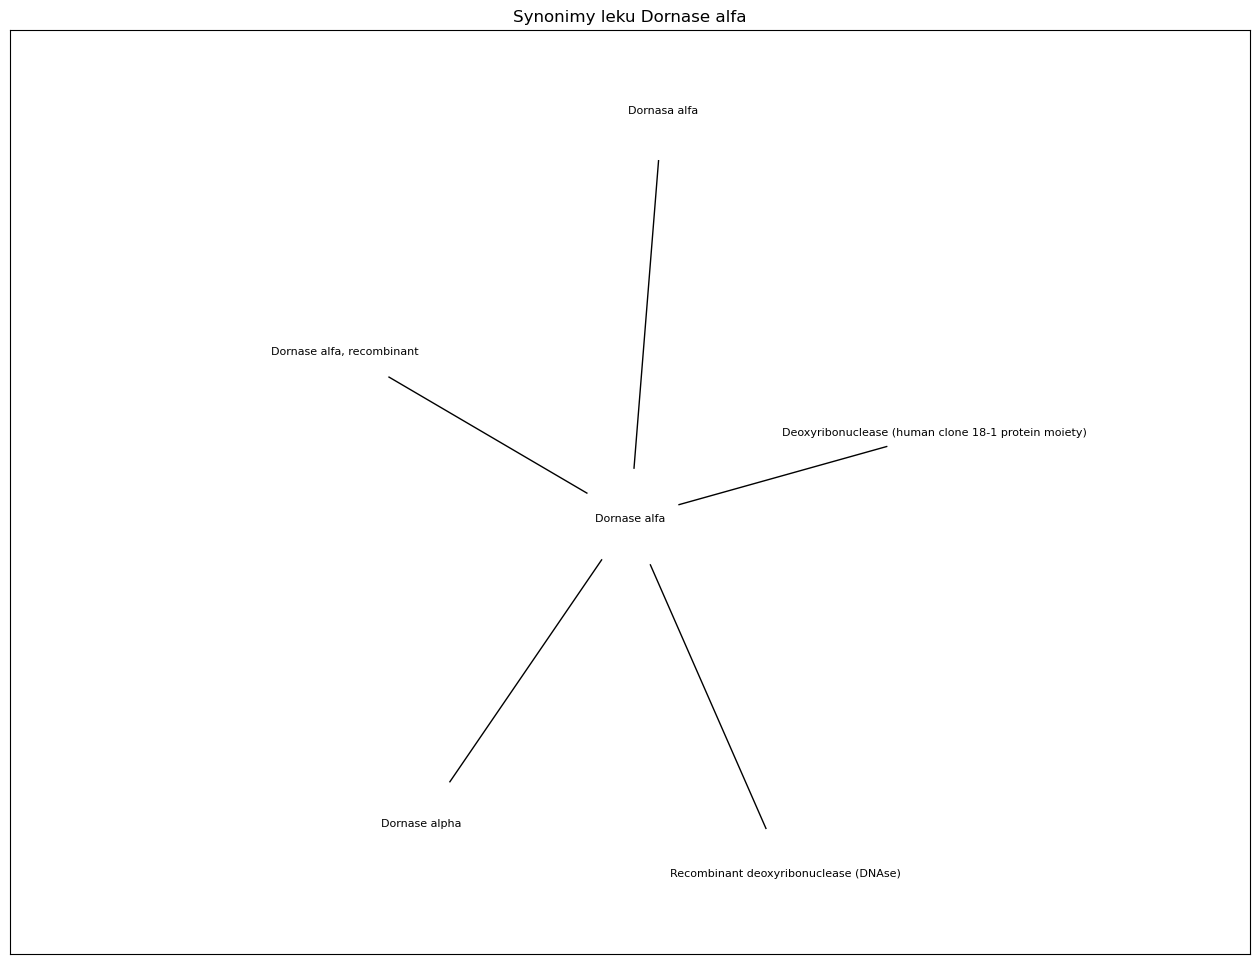

,ID,Name,Synonimy
0,DB00001,Lepirudin,"[[Leu1, Thr2]-63-desulfohirudin, Desulfatohiru..."
1,DB00002,Cetuximab,"[Cetuximab, Cétuximab, Cetuximabum, 2.7.10.1, ..."
2,DB00003,Dornase alfa,[Deoxyribonuclease (human clone 18-1 protein m...
3,DB00004,Denileukin diftitox,"[Denileukin, Denileukin diftitox, Interleukin-..."
4,DB00005,Etanercept,"[Etanercept, etanercept-szzs, etanercept-ykro,..."
...,...,...,...
95,DB00104,Octreotide,"[Octreotida, Octreotide, Octreotidum, Octrotid..."
96,DB00105,Interferon alfa-2b,"[Interferon alfa-2b, Interferon alfa-2b (recom..."
97,DB00106,Abarelix,"[Abarelix, GnRH receptor, GRHR]"
98,DB00107,Oxytocin,"[Oxitocina, Oxytocin, OT-R, 3.4.21.26, PE, PEP..."


In [194]:
from bs4 import BeautifulSoup
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

with open("drugbank_partial.xml", 'r') as file:
    xml_page = file.read()

soup = BeautifulSoup(xml_page, 'xml')
data = soup.find_all(lambda lek: lek.name == 'drug' and lek.has_attr('xmlns'))
wiersze = []

for lek in data:
    synonimy = []
    pom = lek.find_all('synonyms')
    
    for i in pom:
        synonimy += i.find_all('synonym')
    
    lek_info = {
        'ID' : lek.find(lambda atr: atr.name == 'drugbank-id' and atr.has_attr('primary')).text,
        'Name' : lek.find('name').text,
        'Synonimy' : [i.text for i in synonimy]    
    }
    
    wiersze.append(lek_info)

wynik = pd.DataFrame(wiersze)



def znajdz_synonimy(id):
    if id not in wynik['ID'].values:
        print("Podano błędne id.")
        return
    
    syno = wynik.loc[wynik['ID'] == id, 'Synonimy'].values[0]
    name = wynik.loc[wynik['ID'] == id, 'Name'].values[0] 
    
    graph = nx.Graph()
    graph.add_nodes_from(syno)
    
    krawedzie = []
    for i in syno:
        if(i != name):
            krawedzie.append((i, name))
    graph.add_edges_from(krawedzie)
    
    pozycje = nx.kamada_kawai_layout(graph)

    plt.figure(figsize=(16,12))
    
    nx.draw_networkx_edges(graph, pozycje)
    etykiety = {i: str(i) for i in graph.nodes()}
    nx.draw_networkx_nodes(graph, pozycje, alpha=1, node_color="white", node_size=5000)
    nx.draw_networkx_labels(graph, pozycje, labels=etykiety, font_size=8)
    
    plt.xlim(-2, 2)
    plt.title("Synonimy leku " +  str(name))
    plt.show()

znajdz_synonimy('DB00003')

wynik

In [215]:
from bs4 import BeautifulSoup
import pandas as pd
with open("drugbank_partial.xml", 'r') as file:
    xml_page = file.read()

soup = BeautifulSoup(xml_page, 'xml')
data = soup.find_all(lambda lek: lek.name == 'drug' and lek.has_attr('xmlns'))

def znajdz_produkty(id):
    lek = None
    for lek_przeg in data:
        #print(lek_przeg.find(lambda atr: atr.name == 'drugbank-id' and atr.has_attr('primary')))
        id_przeg = lek_przeg.find(lambda atr: atr.name == 'drugbank-id' and atr.has_attr('primary')).text
        if(id_przeg == id):
            lek = lek_przeg
            break

    if(lek == None):
        print("Podano błędne id.")
        return
    
    wiersze = []
    produkty = lek.find_all('products')
    
    for lista_prod in produkty:
        produkty2 = lista_prod.find_all('product')
        
        for produkt in produkty2:
            produkt_info = {
                "ID_leku" : id,
                "Nazwa_produktu " : produkt.find('name').text,
                "Producent" : produkt.find('labeller').text,
                "Kod" : produkt.find('ndc-product-code').text,
                "Postać": produkt.find('dosage-form').text,
                "Sposób aplikacji" : produkt.find('route').text,
                "Dawka" : produkt.find('strength').text,
                "Kraj" : produkt.find('country').text,
                "Agencja rejestrujące" : produkt.find('source').text
            }

            wiersze.append(produkt_info)
    return pd.DataFrame(wiersze)

znajdz_produkty('DB00001')

,ID_leku,Nazwa_produktu,Producent,Kod,Postać,Sposób aplikacji,Dawka,Kraj,Agencja rejestrujące
0,DB00001,Refludan,Bayer,50419-150,Powder,Intravenous,50 mg/1mL,US,FDA NDC
1,DB00001,Refludan,Bayer,,"Powder, for solution",Intravenous,50 mg / vial,Canada,DPD
2,DB00001,Refludan,Celgene Europe Limited,,"Injection, solution, concentrate",Intravenous,50 mg,EU,EMA
3,DB00001,Refludan,Celgene Europe Limited,,"Injection, solution, concentrate",Intravenous,50 mg,EU,EMA
4,DB00001,Refludan,Celgene Europe Limited,,"Injection, solution, concentrate",Intravenous,20 mg,EU,EMA
5,DB00001,Refludan,Celgene Europe Limited,,"Injection, solution, concentrate",Intravenous,20 mg,EU,EMA


In [236]:
from bs4 import BeautifulSoup
import pandas as pd
with open("drugbank_partial.xml", 'r') as file:
    xml_page = file.read()

soup = BeautifulSoup(xml_page, 'xml')
data = soup.find_all(lambda lek: lek.name == 'drug' and lek.has_attr('xmlns'))

def znajdz_szlaki():
    wiersze = []
    for lek in data:
        grupy_szlakow = lek.find_all('pathways')
        for lista_szlakow in grupy_szlakow:
            szlaki = lista_szlakow.find_all('pathway')
            for szlak in szlaki:
                nazwy_lekow = []
                id_lekow = []
                enzymy = []

                for leki in szlak.find_all('drugs'):
                    for lek in leki.find_all('drug'):
                        nazwy_lekow.append(lek.find('name').text)
                        id_lekow.append(lek.find('drugbank-id').text)
                
                for enzym in szlak.find_all('enzymes'):
                    enzymy += enzym.find_all('uniprot-id')

                szlak_info = {
                    "ID_leku" : lek.find("drugbank-id").text,
                    "smpdb-id" : szlak.find("smpdb-id").text,
                    "Nazwa" : szlak.find("name").text,
                    "Kategoria" : szlak.find("category").text,
                    "Nazwy leków" :  nazwy_lekow,
                    "ID leków" : id_lekow,
                    "Enzymy" : enzymy
                }
                wiersze.append(szlak_info)
    wynik = pd.DataFrame(wiersze)
    return wynik, wynik.shape[0]

wyn = znajdz_szlaki()
print(wyn[1])
wyn[0]


12


,ID_leku,smpdb-id,Nazwa,Kategoria,Nazwy leków,ID leków,Enzymy
0,DB01373,SMP0000278,Lepirudin Action Pathway,drug_action,"[Lepirudin, Phylloquinone, Calcium]","[DB00001, DB01022, DB01373]","[[P00734], [P00748], [P02452], [P03952], [P039..."
1,DB00002,SMP0000474,Cetuximab Action Pathway,drug_action,[Cetuximab],[DB00002],[[P00533]]
2,DB01373,SMP0000277,Bivalirudin Action Pathway,drug_action,"[Bivalirudin, Phylloquinone, Calcium]","[DB00006, DB01022, DB01373]","[[P00734], [P00748], [P02452], [P03952], [P039..."
3,DB01373,SMP0000280,Alteplase Action Pathway,drug_action,"[Alteplase, Phylloquinone, Calcium]","[DB00009, DB01022, DB01373]","[[P00747], [P00748], [P02452], [P03952], [P039..."
4,DB01373,SMP0000284,Urokinase Action Pathway,drug_action,"[Urokinase, Phylloquinone, Calcium]","[DB00013, DB01022, DB01373]","[[P00747], [P00748], [P02452], [P03952], [P039..."
5,DB01373,SMP0000285,Reteplase Action Pathway,drug_action,"[Reteplase, Phylloquinone, Calcium]","[DB00015, DB01022, DB01373]","[[P00747], [P00748], [P02452], [P03952], [P039..."
6,DB01373,SMP0000281,Anistreplase Action Pathway,drug_action,"[Anistreplase, Phylloquinone, Calcium]","[DB00029, DB01022, DB01373]","[[P00747], [P00748], [P02452], [P03952], [P039..."
7,DB01373,SMP0000283,Tenecteplase Action Pathway,drug_action,"[Tenecteplase, Phylloquinone, Calcium]","[DB00031, DB01022, DB01373]","[[P00747], [P00748], [P02452], [P03952], [P039..."
8,DB00054,SMP0000265,Abciximab Action Pathway,drug_action,[Abciximab],[DB00054],"[[P08514], [P05106]]"
9,DB00063,SMP0000266,Eptifibatide Action Pathway,drug_action,[Eptifibatide],[DB00063],"[[P08514], [P05106]]"


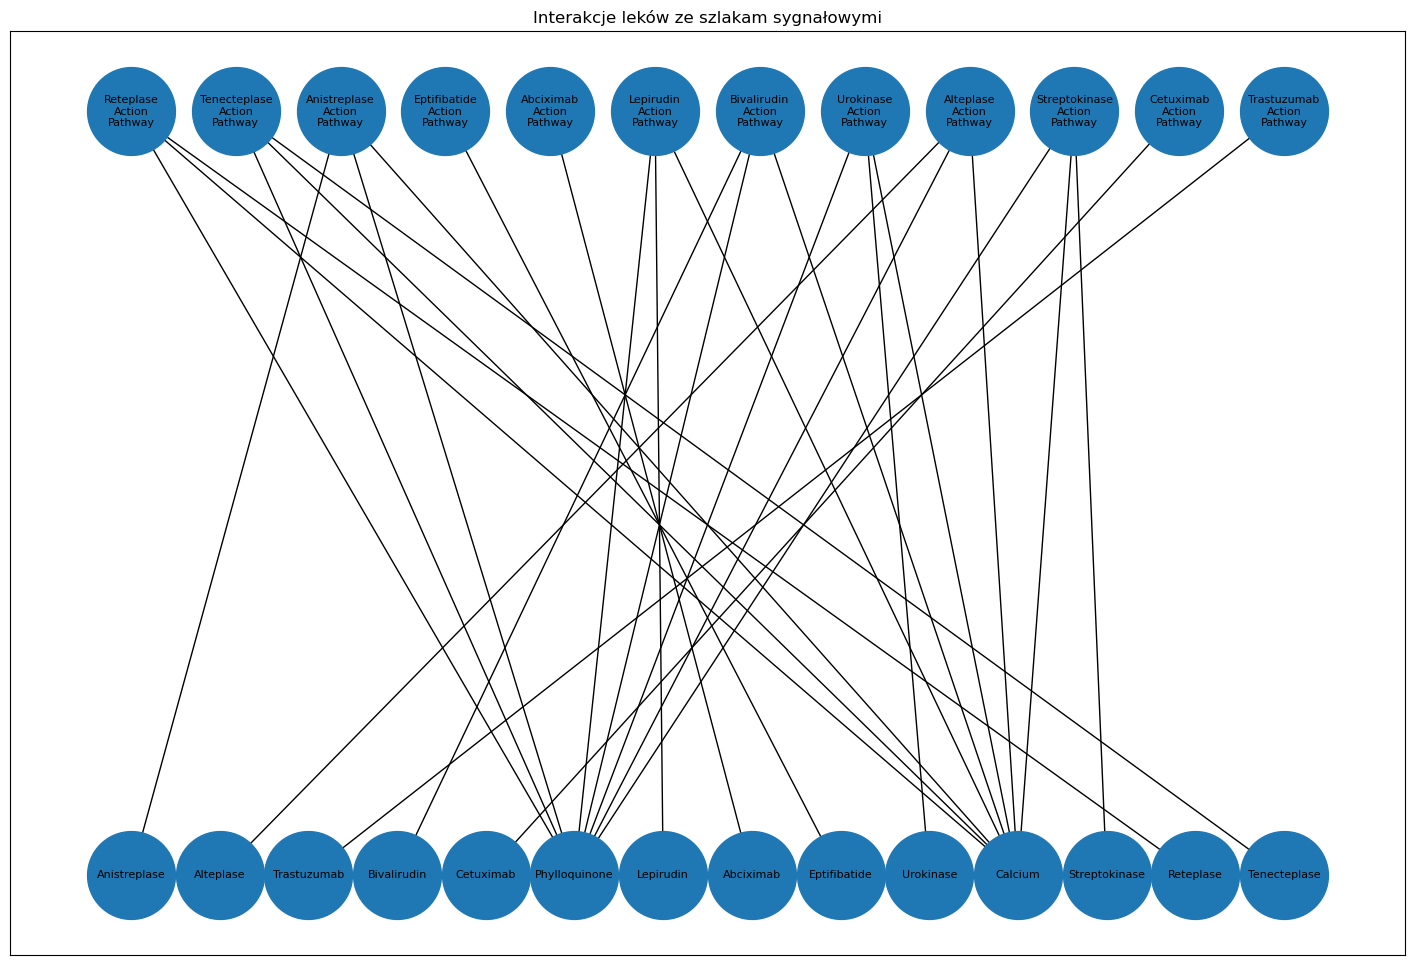

,smpdb-id,Nazwa,Nazwy_leków,ID leków
0,SMP0000278,Lepirudin Action Pathway,"[Lepirudin, Phylloquinone, Calcium]","[DB00001, DB01022, DB01373]"
1,SMP0000474,Cetuximab Action Pathway,[Cetuximab],[DB00002]
2,SMP0000277,Bivalirudin Action Pathway,"[Bivalirudin, Phylloquinone, Calcium]","[DB00006, DB01022, DB01373]"
3,SMP0000280,Alteplase Action Pathway,"[Alteplase, Phylloquinone, Calcium]","[DB00009, DB01022, DB01373]"
4,SMP0000284,Urokinase Action Pathway,"[Urokinase, Phylloquinone, Calcium]","[DB00013, DB01022, DB01373]"
5,SMP0000285,Reteplase Action Pathway,"[Reteplase, Phylloquinone, Calcium]","[DB00015, DB01022, DB01373]"
6,SMP0000281,Anistreplase Action Pathway,"[Anistreplase, Phylloquinone, Calcium]","[DB00029, DB01022, DB01373]"
7,SMP0000283,Tenecteplase Action Pathway,"[Tenecteplase, Phylloquinone, Calcium]","[DB00031, DB01022, DB01373]"
8,SMP0000265,Abciximab Action Pathway,[Abciximab],[DB00054]
9,SMP0000266,Eptifibatide Action Pathway,[Eptifibatide],[DB00063]


In [299]:
from bs4 import BeautifulSoup
import pandas as pd
import networkx as nx

with open("drugbank_partial.xml", 'r') as file:
    xml_page = file.read()

soup = BeautifulSoup(xml_page, 'xml')
data = soup.find_all(lambda lek: lek.name == 'drug' and lek.has_attr('xmlns'))

def znajdz_szlaki():
    wiersze = []
    for lek in data:
        grupy_szlakow = lek.find_all('pathways')
        for lista_szlakow in grupy_szlakow:
            szlaki = lista_szlakow.find_all('pathway')
            for szlak in szlaki:
                nazwy_lekow = []
                id_lekow = []

                for leki in szlak.find_all('drugs'):
                    for lek in leki.find_all('drug'):
                        nazwy_lekow.append(lek.find('name').text)
                        id_lekow.append(lek.find('drugbank-id').text)
                
                szlak_info = {
                    "smpdb-id" : szlak.find("smpdb-id").text,
                    "Nazwa" : szlak.find("name").text,
                    "Nazwy_leków" :  nazwy_lekow,
                    "ID leków" : id_lekow,
                }
                wiersze.append(szlak_info)
    wynik = pd.DataFrame(wiersze)
    return wynik

wyn = znajdz_szlaki()

graph = nx.Graph()
grupaL = []
grupaP = set()
krawedzie = []

for wiersz in wyn.itertuples():
    lek = getattr(wiersz, 'Nazwa')
    pom = getattr(wiersz, 'Nazwy_leków')
    
    for i in range(len(lek)):
        if(lek[i] == ' '):
            lek = lek[:i] + "\n" + lek[(i+1):]
    
    grupaP.update(pom)
    grupaL.append(lek)
    for i in pom:
        krawedzie.append((lek, i))


plt.figure(figsize=(18,12))
graph.add_nodes_from(grupaL, bipartite=0)
graph.add_nodes_from(grupaP, bipartite=1)
graph.add_edges_from(krawedzie)

pozycje = nx.bipartite_layout(graph, nodes=grupaL)
pozycje.update(nx.bipartite_layout(graph, nodes=grupaP))
for pozycja, (x, y) in pozycje.items():
    pozycje[pozycja] = (y, x)

nx.draw_networkx_nodes(graph, pozycje, node_size=4000)
nx.draw_networkx_edges(graph, pozycje)
nx.draw_networkx_labels(graph, pozycje, font_size=8)

plt.title("Interakcje leków ze szlakam sygnałowymi")
plt.show()
wyn


